<a href="https://colab.research.google.com/github/Vibertexs/Tensorflow-Projects/blob/main/BlackJack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Game-Playing with Reinforcement Learning


In [ ]:
import random
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import gym
from IPython.display import HTML

import tqdm

ats = {1: "hit", 0:"stay"}

def play_blackjack(epsilon, print_steps=False):
  game = []
  state = blackjack.reset()
  game_over = False
  while game_over == False:
      if print_steps: 
        print("Your cards: ", blackjack.player)
        print_state(state)
      action = epsilon_greedy(state, epsilon)
      if print_steps: print(f"Agents chooses to {ats[action]}")
      next_state, reward, game_over, _ = blackjack.step(action)
      game.append((state, action))
      state = next_state
      if game_over:
        if print_steps:
          print("Your cards: ", blackjack.player)
          print_state(state)
          print("Game over!")
          print(f"Dealer has {blackjack.dealer}")
          print(rtm[reward])
        game.append(reward)
  return game


def get_best_action(hand_val, dealer_card, usable_ace):
    state = (hand_val, dealer_card, usable_ace)

    # Compute Q(state, True)
    if num_games[(state,True)] == 0:
      Q_state_true = 0
    else:
      Q_state_true = sum_rewards[(state,True)] / num_games[(state,True)]
    
    # Compute Q(state, False)
    if num_games[(state,False)] == 0:
      Q_state_false = 0
    else:
      Q_state_false = sum_rewards[(state,False)] / num_games[(state,False)]

    return Q_state_true >= Q_state_false

def make_subplot(ax, usable_ace):
    x_coords = np.arange(1, 11) # dealer's cards
    y_coords = np.arange(11, 22) # gambler's hand values
    Z = np.array([[get_best_action(y, x, usable_ace) for x in x_coords] for y in y_coords])
    surf = ax.imshow(Z, cmap=plt.get_cmap('Set1', 2), extent=[0.5, 10.5, 21.5, 10.5])
    plt.xticks(x_coords)
    plt.yticks(y_coords)
    plt.gca().invert_yaxis()
    ax.set_xlabel('Dealer Showing')
    ax.set_ylabel('Player Sum')
    col1_patch = mpatches.Patch(color='darkgray', label='Hit')
    col2_patch = mpatches.Patch(color='red', label='Stick')
    plt.legend(handles=[col1_patch, col2_patch])

def plot_strategy():
  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(121)
  ax.set_title('Usable Ace')
  make_subplot(ax, True)
  ax = fig.add_subplot(122)
  ax.set_title('No Usable Ace')
  make_subplot(ax, False)
  plt.show()

def best_action(state):

  # Compute Q(state, True)
  if num_games[(state,True)] == 0:
    Q_state_true = 0
  else:
    Q_state_true = sum_rewards[(state,True)] / num_games[(state,True)]
  
  # Compute Q(state, False)
  if num_games[(state,False)] == 0:
    Q_state_false = 0
  else:
    Q_state_false = sum_rewards[(state,False)] / num_games[(state,False)]

  return Q_state_true >= Q_state_false

def print_state(state):
  print()
  print("Hand value:", state[0])
  print("Dealer's card:", state[1])
  print("Useable ace?:", state[2])
  print("-----")

rtm = {0:"It's a tie!", -1: "You lose!", 1:"You win!"}

def play_n_times(blackjack, n):
  return np.mean([play_human(blackjack) for _ in range(n)])

sum_rewards = Counter()
num_games = Counter()



# Reinforcement Learning


**Here are some examples of what RL can do**. 


![](https://lh3.googleusercontent.com/cTaZiZNod4_aZxSYzV-MuAzavS87y838E9Zp8BHrz65_DLi3cJCESl0sDO2ucRxLByeiJ9fQFx4kC8c-6wKivikliGgNFd7c7WIfKfQ=w1440)





In [ ]:
#@title Run to see an example of a RL agent learning to play breakout!

HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/V1eYniJ0Rnk" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

# Blackjack

![](https://upload.wikimedia.org/wikipedia/commons/3/33/Blackjack21.jpg)

We'll use the game of blackjack . Though you can be sure that the odds are *always* against the gambler, certain play strategies are better than others. Despite Blackjack having been played since the 17th century, it was not until 1956 that a team of statisticians managed to find the provably optimal play strategy through a lengthy series of probability calculations!

Black Jack Rules:


* You and the dealer each start with two cards. You can see both of your cards and one of the dealer's cards
* You decide to either "hit" or "stay"
* "hit" means you draw another card
* "stay" means you're done!
* The goal is to make the sum of your cards higher than the dealers, but not higher than 21.
* J, Q, K are each worth 10
* A is worth either 1 or 11 (whichever gives you the highest sum without going over 21)
* Dealer gets to pick cards after you're done


In [ ]:
blackjack = gym.make('Blackjack-v0')

In [ ]:
play_human(blackjack)


Your cards:  [5, 4]
Hand value: 9
Dealer's card: 5
Useable ace?: False
-----
1 for hit 0 for stay: 1
Your cards:  [5, 4, 8]
Hand value: 17
Dealer's card: 5
Useable ace?: False
-----
1 for hit 0 for stay: 0
Your cards:  [5, 4, 8]
Hand value: 17
Dealer's card: 5
Useable ace?: False
-----
Game over!
Dealer has [5, 1, 5]
You lose!


-1.0

# Defining the world


These interact together to define our world as follows!

![](https://dzone.com/storage/temp/6976061-screen-shot-2017-10-20-at-22200-pm.png)



In blackjack, we'll define a **state** using the following format:

$s = $`(sum_of_cards_in_hand, dealers_card, useable_ace)`

where:

*   `sum_of_cards_in_hand` is sum of cards in hand (integer)
*   `dealers_card` is the dealer's visible card (integer) 
*   `useable_ace` is whether or not we have a useable ace (boolean)

The **actions** are to hit or to stay.

Because we are interested in training our agent to win as much as possible, we'll define a simple **reward** function which is $+1$ upon winning, $-1$ upon losing, and $0$ at all intermediate (i.e. non-game-ending) states, as well as upon tieing. We might make several moves before we get get a non-zero reward!

# Policy

We're trying to learn a **policy**: rules for how we'll select **actions** based on the **state** of the world. The objective is to learn a policy that gets us the largest **reward** possible!

# Value

Let's define the **value** $Q(s, a)$ of an action $a$, at state $s$ as the expected future reward of taking an action at a certain state. Think $Q$ for quality: what payoff should we expect with this move?




Note that in real life we don't get a nice dictionary with our value function, so we'll have to learn it! This is the core idea behind our algorithm for today, which is called **Q-learning**. By experimenting with different actions, we'll learn what tends to happen when we make an action from a particular state.


# Q-Learning - Estimating Value

In order to learn $Q$, we'll repeat the following two steps:
1. Run an episode: have the agent interact with the world in some way (more on how later!)
2. Update the value, $Q(s, a)$, for each $(s, a)$ pair that occurred in the episode based on the rewards that we got!

For blackjack this is: 
1.   Play a game of Blackjack.
2.   Update the $Q(s,a)$ value, for each $(s,a)$ pair that occurred in the game, based on whether we won or lost at the end.



## Updating the Value Estimates

We can represent our game of blackjack like this:

$s_1, a_1, s_2, a_2, \ldots, s_n, a_n, r$

Where $r$ is the reward received at the end of the game: we're in a state, we take an action, repeat. Eventually, the game ends and we get a reward.

One complication here is that Blackjack games last for a variable number of moves, so we don't know what $n$ is upfront!

Suppose that, in code, this gameplay data is given you in the following form:

`game = [(s_1,a_1), (s_2,a_2), ... , (s_n,a_n), r]`

That is, `game` is a `List` of $n$ `Tuples` (each of which contains a state and an action) followed by a single reward at the end.

We'll keep a tally of the rewards we get for each action in each state, so that later we can find the average value.

**Exercise:** Write a function that takes a `game` as argument and updates `sum_rewards` and `num_games` appropriately.
* `sum_rewards[(s, a)]` is the total reward at the state `(s, a)`.
* `num_games[(s, a)]` is the number of times we've seen the state `(s, a)`.

At the start, the two dictionaries are both initialized so that the value for each `(s, a)` pair is 0.

In [ ]:
def update_counters(game):
  reward = game[-1]
  for state_action_tuple in game[:-1]: #tuple is (s,a)
    sum_rewards[state_action_tuple] += reward
    num_games[state_action_tuple] +=1

# Choosing Actions

Now we've got a way to learn the value of each action from each state!

But how do we use that to actually play the game while we're still learning? (What policy does the agent use while it is training?)

Following strategies:
* **Explore:** At any state, just randomly select an action!
* **Exploit:** At any state, pick the action we currently think is the best based on our value estimate! (this is the q_policy_implementation that we wrote!)

![](https://asopa.typepad.com/.a/6a00d83454f2ec69e2022ad3b982a8200b-800wi)


### Epsilon Greedy ($\varepsilon$-greedy) approach!

There is a trade-off between the two strategies above, so we compromise and mix the two strategies together! We'll use something called the $\varepsilon$-greedy algorithm! This algorithm explores (selects a random action) with probability $\varepsilon$, and exploits (selects the best action) with probability $(1-\varepsilon)$. 

**Exercise:** Read the code below to see how this policy is implemented!

In [ ]:
def epsilon_greedy(state, epsilon):

  # Return best_action with probability 1-epsilon
  if np.random.rand() > epsilon:
    return best_action(state)
  
  # Otherwise, return random action
  else:
    return np.random.choice([0,1])

# Training our Agent

Time to put it all together and actually train our agent to learn a good blackjack strategy!

We'll use the `play_blackjack(epsilon)` function which plays the game of blackjack using the epsilon_greedy policy, and then update our counters!

In [ ]:
epsilon = 0.15
sum_rewards = Counter()
num_games = Counter()

for iteration in tqdm.tqdm(range(1000000)):
  game = play_blackjack(epsilon)
  update_counters(game)


100%|██████████| 1000000/1000000 [01:01<00:00, 16355.98it/s]


In [ ]:
play_blackjack(epsilon=0, print_steps=True)

Your cards:  [10, 4]

Hand value: 14
Dealer's card: 10
Useable ace?: False
-----
Agents chooses to hit
Your cards:  [10, 4, 10]

Hand value: 24
Dealer's card: 10
Useable ace?: False
-----
Game over!
Dealer has [10, 2]
You lose!


[((14, 10, False), True), -1.0]

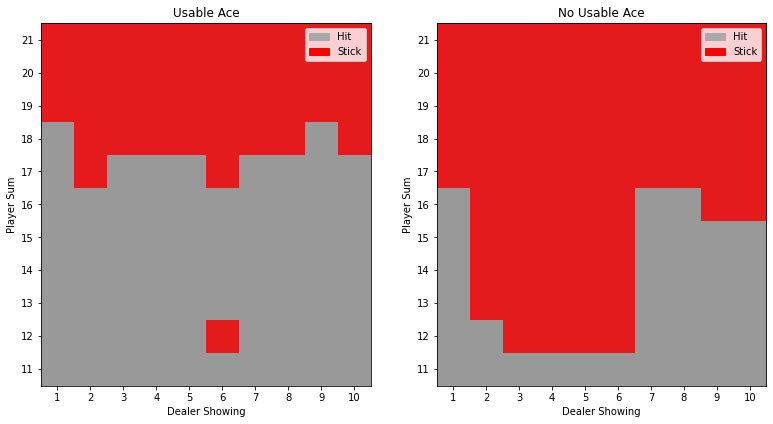

In [ ]:
plot_strategy()

Compare the strategy that your agent learned to the optimal Blackjack strategy, shown below on the left. It should look pretty similar!

(Notice that the grid layouts differ a bit between our visualization and the one below; we plot the best actions aligned with the tick marks, whereas the following figure plots the best actions in between tick marks).


![alt text](https://ankonzoid.github.io/LearningX/classical_RL/blackjack/images/coverart.png)
